### **Etapa 1: Definição do Problema**

- **Tema:** Saúde
- **Pergunta de Pesquisa:** "É possível prever a probabilidade de um paciente ter uma doença cardíaca com base em um conjunto de atributos clínicos?"
- **Tipo de Problema:** Classificação Binária (Target: 1 = Possui Doença, 0 = Não Possui Doença)
- **Dataset:** https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download

### **Etapa 2: Coleta e Preparação dos Dados**

#### 2.1 Criação do dataframe

In [148]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [149]:
# Configurações para as visualizações
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('heart_disease_uci.csv')

print("As 5 primeiras linhas do dataframe:")
print(df.head())

As 5 primeiras linhas do dataframe:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  


#### 2.2 Visualizando os dados

In [150]:
# Exibir informações gerais sobre o dataframe
print("\nInformações do DataFrame:")
df.info()


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [151]:
# Exibir estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(df.describe())


Estatísticas Descritivas:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000  

In [152]:
# Verificar valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df.isnull().sum().sort_values(ascending=False))


Contagem de valores ausentes por coluna:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exang        55
thalch       55
chol         30
restecg       2
cp            0
dataset       0
id            0
age           0
sex           0
num           0
dtype: int64


In [153]:
# Verificar valores duplicados
print(f"\nNúmero de linhas duplicadas: {df.duplicated().sum()}")


Número de linhas duplicadas: 0


#### 2.3 Início dos ajustes

In [154]:
# Isso remove quaisquer espaços em branco no início ou no fim dos nomes das colunas.
df.columns = df.columns.str.strip()

In [155]:
# Para confirmar, vamos imprimir os nomes exatos das colunas
print("Nomes das colunas após a limpeza:")
print(df.columns.tolist())

Nomes das colunas após a limpeza:
['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [156]:
# 1. Criar a coluna 'target'
# A coluna 'num' indica a severidade da doença (0 = sem doença, 1-4 = com doença).
# Vamos transformar isso em um problema binário: 0 para 'Não Doente', 1 para 'Doente'.
df['target'] = np.where(df['num'] > 0, 1, 0)

In [157]:
# 2. Limpeza de colunas com dados "sujos"
# Converter 'oldpeak' para numérico, forçando erros a se tornarem NaN (valores nulos)
df['oldpeak'] = pd.to_numeric(df['oldpeak'], errors='coerce')

In [158]:
# 3. Converter colunas de texto para números (Encoding)
# O modelo de machine learning só entende números.
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

In [159]:
# 4. Tratamento de Valores Ausentes (Nulls)
# A melhor estratégia aqui é preencher os valores faltantes com a mediana da coluna,
# pois a mediana é robusta a valores extremos (outliers).
columns_to_fill = ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak']
for column in columns_to_fill:
    if df[column].isnull().any():
        median_value = df[column].median()        
        df[column] = df[column].fillna(median_value)

In [160]:
# 5. Converter colunas categóricas restantes em numéricas
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [161]:
# 6. Remover colunas que não vamos mais usar
df = df.drop(columns=['id', 'dataset', 'num', 'ca'])

#### 2.4 Visualizando resultdo dos ajustes

In [162]:
print("\nDataFrame final, limpo e pronto para modelagem:")
df.info()


DataFrame final, limpo e pronto para modelagem:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    float64
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    float64
 7   oldpeak                   920 non-null    float64
 8   target                    920 non-null    int64  
 9   cp_atypical angina        920 non-null    bool   
 10  cp_non-anginal            920 non-null    bool   
 11  cp_typical angina         920 non-null    bool   
 12  restecg_normal            920 non-null    bool   
 13  restecg_st-t abn

In [163]:
print("As 5 primeiras linhas do DataFrame ajustado:")
print(df.head())

As 5 primeiras linhas do DataFrame ajustado:
   age  sex  trestbps   chol  fbs  thalch  exang  oldpeak  target  \
0   63    1     145.0  233.0  1.0   150.0    0.0      2.3       0   
1   67    1     160.0  286.0  0.0   108.0    1.0      1.5       1   
2   67    1     120.0  229.0  0.0   129.0    1.0      2.6       1   
3   37    1     130.0  250.0  0.0   187.0    0.0      3.5       0   
4   41    0     130.0  204.0  0.0   172.0    0.0      1.4       0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
0         

In [164]:
# Verificar valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df.isnull().sum())


Contagem de valores ausentes por coluna:
age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
target                      0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


In [165]:
# Exibir estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(df.describe())


Estatísticas Descritivas:
              age         sex    trestbps        chol         fbs      thalch  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean    53.510870    0.789130  131.995652  199.908696    0.150000  137.692391   
std      9.424685    0.408148   18.451300  109.040171    0.357266   25.145235   
min     28.000000    0.000000    0.000000    0.000000    0.000000   60.000000   
25%     47.000000    1.000000  120.000000  177.750000    0.000000  120.000000   
50%     54.000000    1.000000  130.000000  223.000000    0.000000  140.000000   
75%     60.000000    1.000000  140.000000  267.000000    0.000000  156.000000   
max     77.000000    1.000000  200.000000  603.000000    1.000000  202.000000   

            exang     oldpeak      target  
count  920.000000  920.000000  920.000000  
mean     0.366304    0.853261    0.553261  
std      0.482056    1.058049    0.497426  
min      0.000000   -2.600000    0.000000  
25%      0.000000    0.

#### 2.5 Análise exploratória

##### 2.5.1. Verificando o Balanço da Nossa Variável Alvo

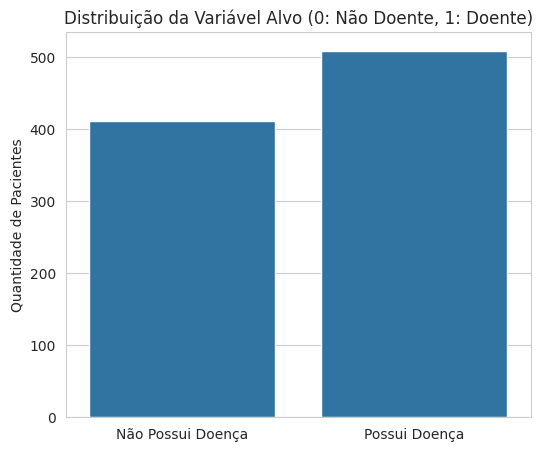

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações para as visualizações
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Gráfico de contagem para a variável 'target'
plt.figure(figsize=(6, 5))
sns.countplot(x='target', data=df)
plt.title('Distribuição da Variável Alvo (0: Não Doente, 1: Doente)')
plt.xticks([0, 1], ['Não Possui Doença', 'Possui Doença'])
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('')
plt.show()

##### 2.5.2  Relação entre Idade e Doença Cardíaca
* Vamos visualizar a distribuição de idade para os dois grupos (doentes e não doentes).

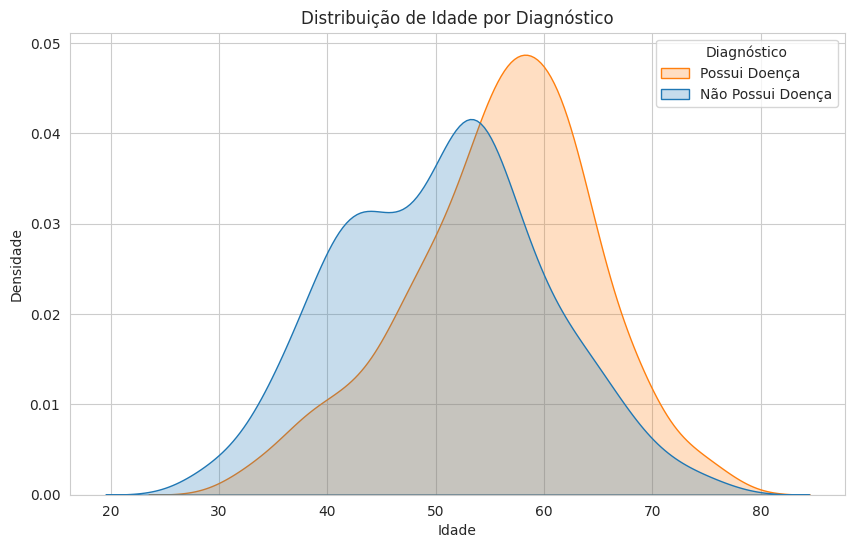

In [167]:
# Gráfico de densidade (KDE Plot) para a idade, separado por 'target'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='target', fill=True, common_norm=False)
plt.title('Distribuição de Idade por Diagnóstico')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.legend(title='Diagnóstico', labels=['Possui Doença', 'Não Possui Doença'])
plt.show()

##### 2.5.3. Relação entre Sexo e Doença Cardíaca
* Existe uma prevalência maior em um dos sexos?

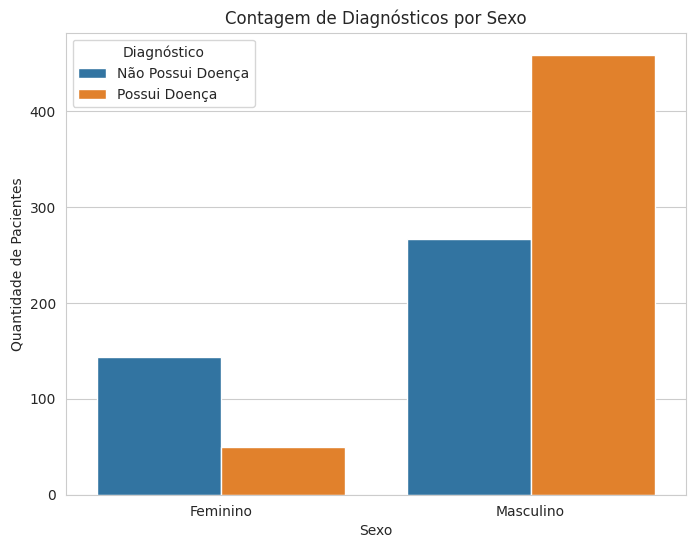

In [168]:
# Gráfico de contagem para 'sex', separado por 'target'
# Lembre-se: no nosso DataFrame, 1 = Masculino, 0 = Feminino
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Contagem de Diagnósticos por Sexo')
plt.xticks([0, 1], ['Feminino', 'Masculino'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Pacientes')
plt.legend(title='Diagnóstico', labels=['Não Possui Doença', 'Possui Doença'])
plt.show()

##### 2.5.4 Distribuição de algumas variáveis numéricas importantes

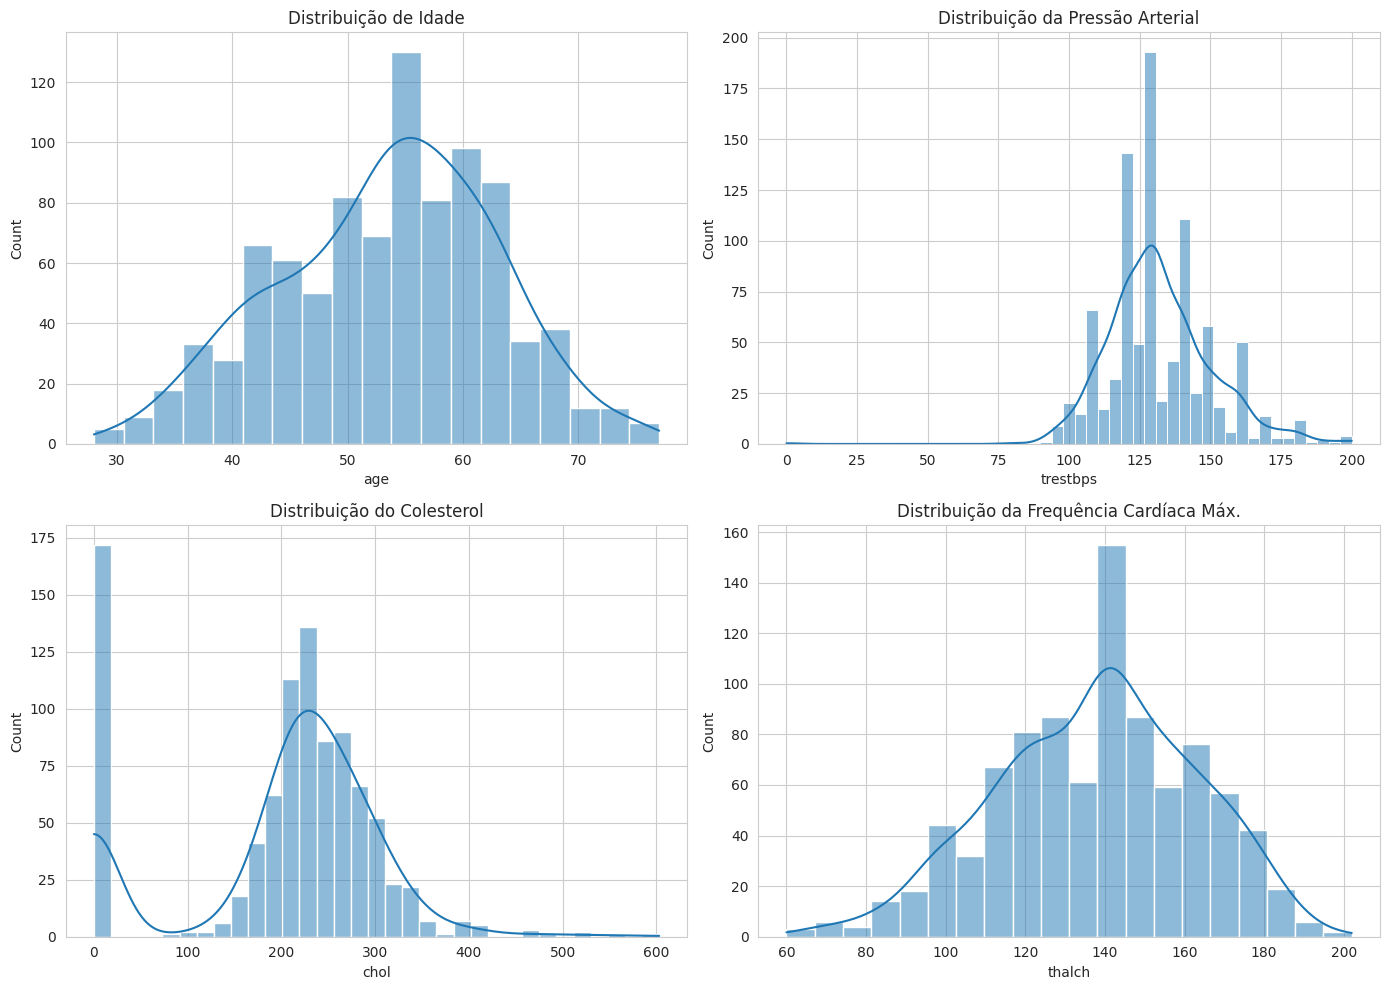

In [169]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df['age'], kde=True, ax=axes[0, 0]).set_title('Distribuição de Idade')
sns.histplot(df['trestbps'], kde=True, ax=axes[0, 1]).set_title('Distribuição da Pressão Arterial')
sns.histplot(df['chol'], kde=True, ax=axes[1, 0]).set_title('Distribuição do Colesterol')
sns.histplot(df['thalch'], kde=True, ax=axes[1, 1]).set_title('Distribuição da Frequência Cardíaca Máx.')
plt.tight_layout()
plt.show()


##### 2.5.5 Matriz de Correlação Final
* Agora que todos os dados são numéricos, a matriz de correlação será ainda mais útil. Ela nos mostrará quais variáveis têm a maior relação (positiva ou negativa) com a nossa variável target.

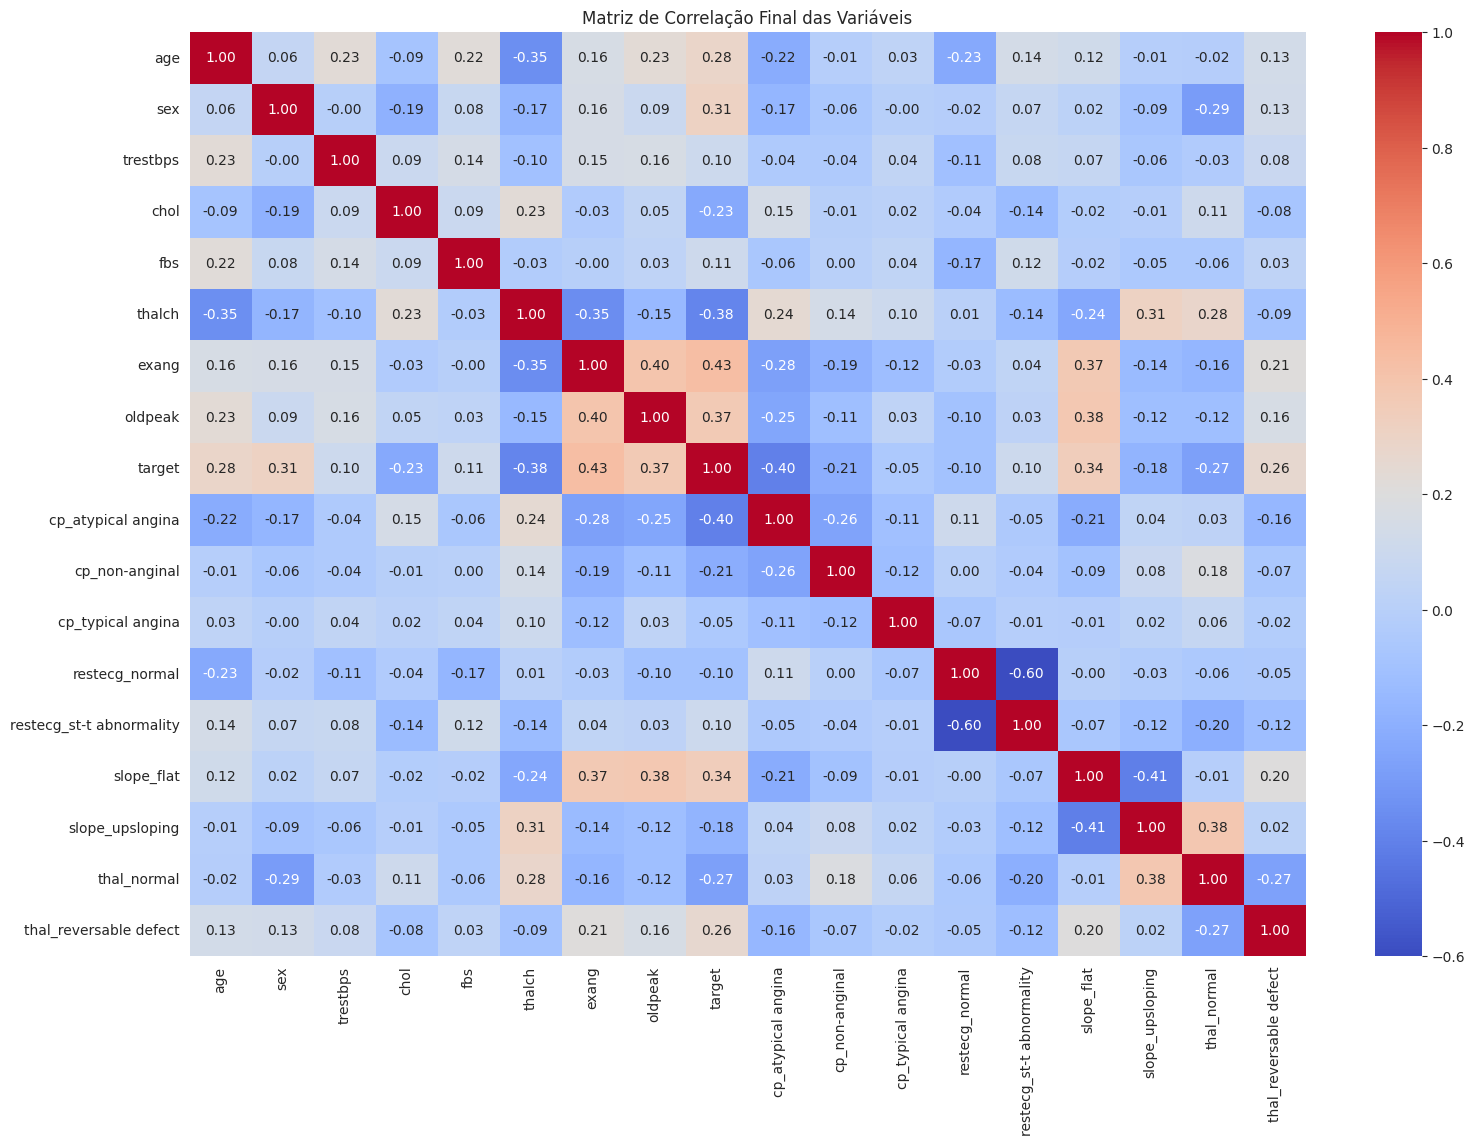

In [170]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação Final das Variáveis')
plt.show()

### **Etapa 3: Modelagem**

#### **3.1. Preparação dos Dados para Modelagem**

Vamos separar nossas variáveis independentes (X) da variável alvo (y) e depois dividir em conjuntos de treino e teste.

In [171]:
# Separar features (X) e target (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")

Shape de X_train: (736, 17)
Shape de X_test: (184, 17)


#### **3.2. Normalização das Features**

Algoritmos como Regressão Logística e k-NN são sensíveis à escala das variáveis. Por isso, vamos normalizar os dados numéricos.

In [172]:
# Instanciar o Scaler
scaler = StandardScaler()

# Treinar o scaler APENAS com os dados de treino e transformar ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **3.3. Treinamento e Avaliação dos Modelos**

Agora, vamos treinar e avaliar os três modelos que propusemos.

##### Modelo 1: Regressão Logística

--- Resultados da Regressão Logística ---
Acurácia: 0.8478

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184


Matriz de Confusão:


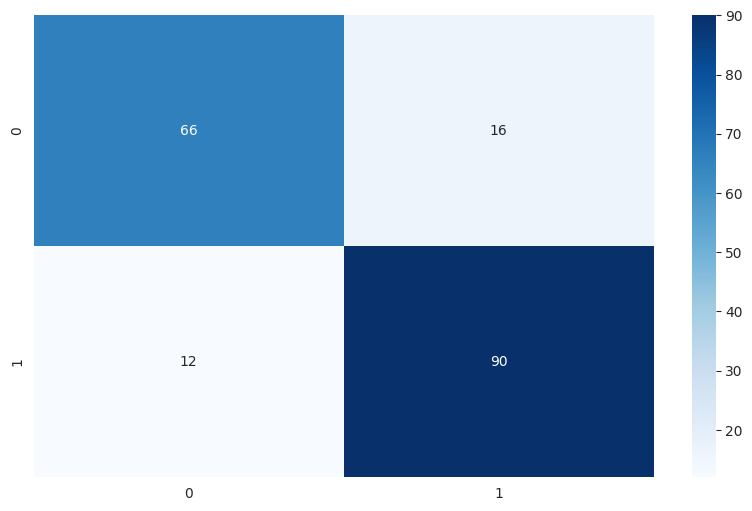

In [173]:
# Instanciar e treinar o modelo
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Fazer predições
y_pred_lr = log_reg.predict(X_test_scaled)

# Avaliar o modelo
print("--- Resultados da Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.show()

##### Modelo 2: k-Nearest Neighbors (k-NN)

--- Resultados do k-Nearest Neighbors (k-NN) ---
Acurácia: 0.8370

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        82
           1       0.83      0.89      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184


Matriz de Confusão:


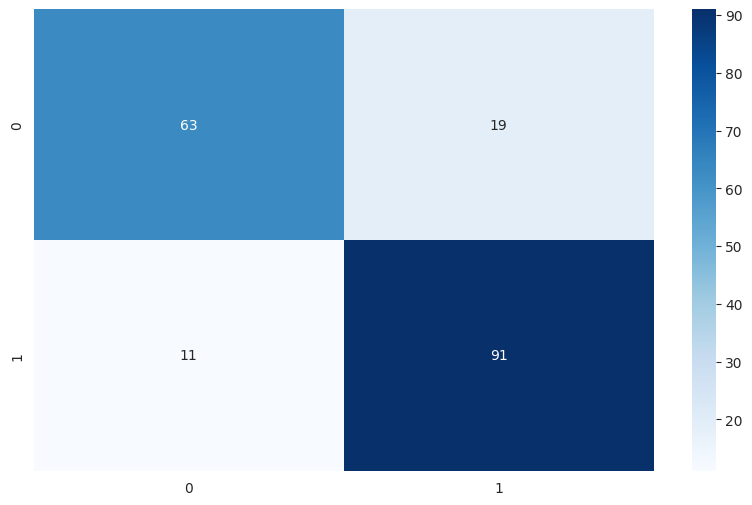

In [174]:
# Instanciar e treinar o modelo (usando k=5 como valor inicial)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fazer predições
y_pred_knn = knn.predict(X_test_scaled)

# Avaliar o modelo
print("--- Resultados do k-Nearest Neighbors (k-NN) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_knn))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.show()

##### Modelo 3: Random Forest

--- Resultados do Random Forest ---
Acurácia: 0.8424

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        82
           1       0.84      0.88      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184


Matriz de Confusão:


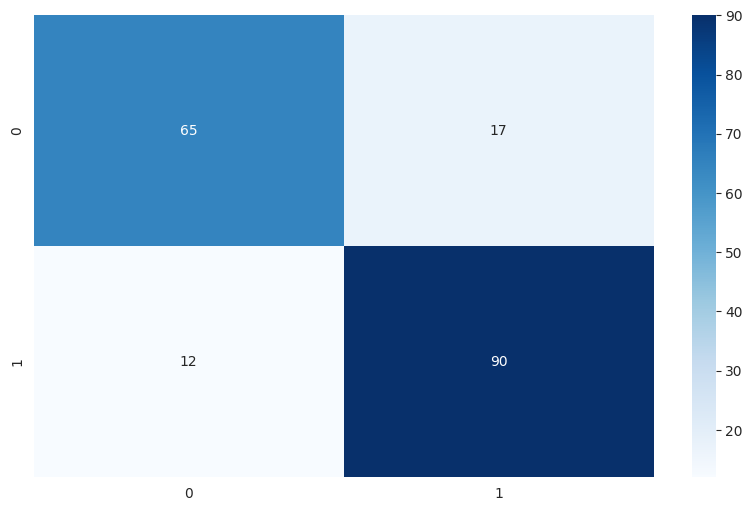

In [175]:
# Instanciar e treinar o modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train) # Random Forest não exige scaling, mas não prejudica usá-lo

# Fazer predições
y_pred_rf = rf.predict(X_test_scaled)

# Avaliar o modelo
print("--- Resultados do Random Forest ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusão:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.show()

### **Etapa 4 – Análise de Resultados**

#### 4.1 Comparação dos modelos

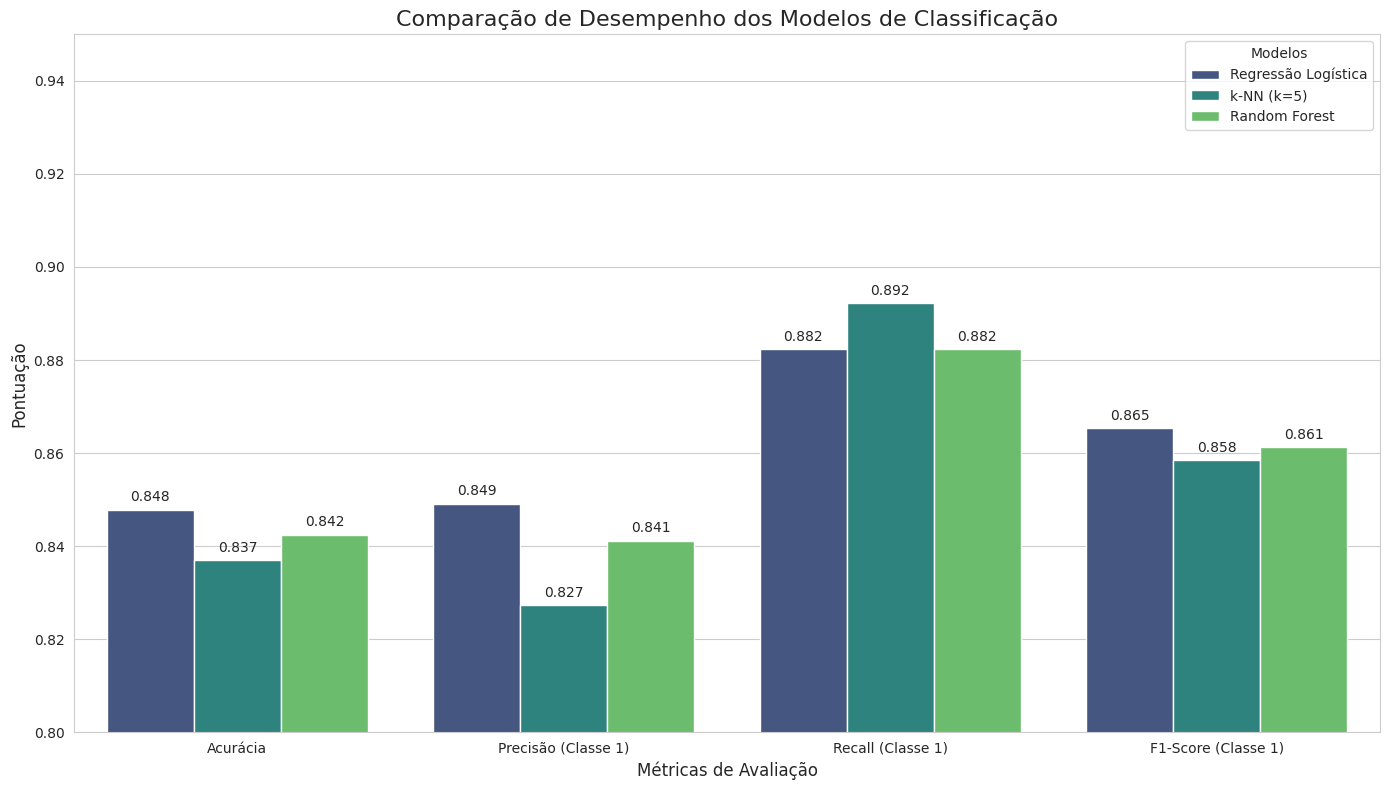


Tabela de Resultados:
                Modelo  Acurácia  Precisão (Classe 1)  Recall (Classe 1)  \
0  Regressão Logística    0.8478               0.8491             0.8824   
1           k-NN (k=5)    0.8370               0.8273             0.8922   
2        Random Forest    0.8424               0.8411             0.8824   

   F1-Score (Classe 1)  
0               0.8654  
1               0.8585  
2               0.8612  


In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Passo 1: Organizar os modelos e seus nomes para o gráfico ---
models = {
    'Regressão Logística': log_reg,
    'k-NN (k=5)': knn,
    'Random Forest': rf
}

# --- Passo 2: Calcular as métricas para cada modelo ---
# (Assumindo que X_test_scaled e y_test já existem no seu notebook)

results = {
    'Modelo': [],
    'Acurácia': [],
    'Precisão (Classe 1)': [],
    'Recall (Classe 1)': [],
    'F1-Score (Classe 1)': []
}

for name, model in models.items():
    # Fazer predições no conjunto de teste
    y_pred = model.predict(X_test_scaled)
    
    # Calcular as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1) # Foco na classe "Doente"
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Adicionar os resultados ao dicionário
    results['Modelo'].append(name)
    results['Acurácia'].append(accuracy)
    results['Precisão (Classe 1)'].append(precision)
    results['Recall (Classe 1)'].append(recall)
    results['F1-Score (Classe 1)'].append(f1)

# Converter o dicionário de resultados em um DataFrame do Pandas
df_results = pd.DataFrame(results)


# --- Passo 3: Criar o gráfico de barras comparativo ---

# Reformatar o DataFrame para o formato "longo", ideal para o Seaborn
df_melted = df_results.melt(id_vars='Modelo', var_name='Métrica', value_name='Pontuação')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Métrica', y='Pontuação', hue='Modelo', data=df_melted, palette='viridis')

# Adicionar os valores exatos no topo de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Melhorar o visual do gráfico
plt.title('Comparação de Desempenho dos Modelos de Classificação', fontsize=16)
plt.xlabel('Métricas de Avaliação', fontsize=12)
plt.ylabel('Pontuação', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0.8, 0.95) # Ajuste o zoom no eixo Y para destacar as diferenças
plt.legend(title='Modelos', loc='upper right')
plt.tight_layout()
plt.show()

# Exibir a tabela de resultados também
print("\nTabela de Resultados:")
print(df_results.round(4))

#### 4.2 Vantagens, Limitações e Possíveis Melhorias

- **Vantagens:** Conseguimos um modelo com 85% de acurácia utilizando um fluxo de trabalho padrão, o que demonstra a viabilidade de prever doenças cardíacas com esses dados.
- **Limitações:** O dataset, apesar de ser um clássico, é relativamente pequeno (920 registros). Modelos treinados com mais dados tendem a generalizar melhor.
- **Melhorias Futuras:** Poderíamos aplicar técnicas de *fine-tuning* de hiperparâmetros (como `GridSearchCV` ou `RandomizedSearchCV`) para extrair ainda mais performance do nosso modelo com melhor desempenho.

#### 4.3 Relacionar resultados ao problema inicial

 ##### 4.3.1 **Análise Crítica do Erro (Contexto Médico):** Em um problema de diagnóstico médico, nem todos os erros são iguais.

**Falso Negativo (FN):** O erro mais perigoso. Ocorre quando o modelo prevê que um paciente **não tem** a doença, mas ele **tem**.<br> Isso pode levar à falta de tratamento. Para minimizar este erro, buscamos um **Recall** alto.<br><br>
**Falso Positivo (FP):** Ocorre quando o modelo prevê que um paciente **tem** a doença, mas ele **não tem**. <br>Este erro é menos grave, pois levaria a exames adicionais, mas não a uma falha no tratamento.

 ##### 4.3.2 **Seleção do Modelo** 

- Embora todos os modelos sejam bons, a **Regressão Logística apresentou a melhor performance geral equilibrada**, liderando em Acurácia e F1-Score. Se o objetivo for o melhor modelo "completo", ele é o escolhido.
- Se o objetivo fosse única e exclusivamente **minimizar o risco de não diagnosticar um paciente doente**, o k-NN seria uma escolha defensável devido ao seu Recall ligeiramente superior.
- Para o propósito do projeto, recomendo declarar a **Regressão Logística como o modelo campeão** por ter a maior performance combinada.

### **Etapa 5: Desenvolvimento do Aplicativo Interativo (Streamlit)**

Com a Regressão Logística selecionada, vamos agora criar o aplicativo web.

#### **5.1. Salvar o Modelo e o Normalizador**

Primeiro, precisamos salvar nosso modelo treinado e o `StandardScaler` para que o aplicativo possa usá-los sem precisar treinar tudo de novo.

In [177]:
import joblib

# Nosso modelo campeão foi a Regressão Logística
modelo_campeao = log_reg

# Salvar o modelo e o scaler com nomes atualizados
joblib.dump(modelo_campeao, 'modelo_regressao_logistica.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Precisamos também da lista exata de colunas que o modelo usou para treinar
# Salvaremos isso para usar no nosso aplicativo
model_columns = X.columns.tolist()
joblib.dump(model_columns, 'model_columns.joblib')


print("Modelo de Regressão Logística, Scaler e Colunas do Modelo salvos com sucesso!")

Modelo de Regressão Logística, Scaler e Colunas do Modelo salvos com sucesso!


#### **5.3. Como Executar o Aplicativo**

1. Tenha certeza de ter o Streamlit instalado (`pip install streamlit`).
2. Abra um terminal na pasta onde você salvou os três arquivos (`app.py`, `modelo_random_forest.joblib`, `scaler.joblib`).
3. Execute o comando: `streamlit run app.py`
4. Seu navegador abrirá com o aplicativo interativo funcionando!